In [42]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

In [43]:
print(os.getcwd())
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

/Users/bglickenhaus/Documents/rescue_lab/cpr/rl/scripts


In [47]:
with open('../../breakevens.pkl', 'rb') as f:
    breakevens = pd.read_pickle(f)
with open('../../breakevens_gamma_0.9.pkl', 'rb') as f:
    breakevens_gamma_0_9 = pd.read_pickle(f)
breakevens['gamma'] = 0.5
breakevens_gamma_0_9['gamma'] = 0.9
breakevens = pd.concat([breakevens, breakevens_gamma_0_9])

In [48]:
with open(f'../saved_models/model_evals.pkl', 'rb') as f:
    eval_df = pd.read_pickle(f)
    eval_df['gamma'] = 0.5
    breakevens = pd.concat([breakevens, eval_df])

with open(f'../saved_models/model_evals_gamma_0.9.pkl', 'rb') as f:
    eval_df_gamma_0_9 = pd.read_pickle(f)
    eval_df_gamma_0_9['gamma'] = 0.9
    breakevens = pd.concat([breakevens, eval_df_gamma_0_9])
breakevens = breakevens.reset_index(drop=True)

In [49]:
breakevens.policy.unique()

array(['override-catchup', 'override-block', 'release-block', 'honest',
       '2ys8h4ek', '3vnzkvsy', '2x496teq'], dtype=object)

In [39]:
honest = breakevens[breakevens.policy == 'honest']
selfish = breakevens[breakevens.policy == '2ys8h4ek']
ttest_ind(honest.reward, selfish.reward, alternative="less", permutations=5)


Ttest_indResult(statistic=13.36834670930809, pvalue=1.0)

In [50]:
for key_a, grp_a in breakevens.groupby(['policy', 'reward_scheme', 'alpha', 'gamma']):
    for key_b, grp_b in breakevens.groupby(['policy', 'reward_scheme', 'alpha', 'gamma']):
        if key_a[0] == key_b[0]:
            continue
        if key_a[0] != "honest":
            continue
        if key_a[1] != key_b[1]:
            continue
        if key_a[2] != key_b[2]:
            continue
        if key_a[3] != key_b[3]:
            continue
        
        t_stat, p_value = ttest_ind(grp_a.reward, grp_b.reward, alternative="less")
        if p_value < 0.05:
            print(f"{key_a} vs {key_b}")
            print(f"Honest mean reward: {grp_a.reward.mean()}, {key_b[0]} mean reward: {grp_b.reward.mean()}")
            print(f"t stat: {t_stat}, p value: {p_value}")
            print()

('honest', 'constant', 0.16999999999999998, 0.9) vs ('2x496teq', 'constant', 0.16999999999999998, 0.9)
Honest mean reward: -0.7463239683160967, 2x496teq mean reward: 1.2198674640894334
t stat: -2.5905176333826185, p value: 0.005147960436177701

('honest', 'constant', 0.17999999999999997, 0.9) vs ('2x496teq', 'constant', 0.17999999999999997, 0.9)
Honest mean reward: 0.058586985506033716, 2x496teq mean reward: 1.333225829493
t stat: -1.7032264014912457, p value: 0.04504738609495656

('honest', 'constant', 0.20999999999999996, 0.9) vs ('2x496teq', 'constant', 0.20999999999999996, 0.9)
Honest mean reward: -0.9574248305695002, 2x496teq mean reward: 1.307932523870747
t stat: -2.256586843021096, p value: 0.012563215614242873

('honest', 'constant', 0.22999999999999995, 0.9) vs ('2x496teq', 'constant', 0.22999999999999995, 0.9)
Honest mean reward: 0.570625013209354, 2x496teq mean reward: 2.385988667553321
t stat: -2.0409498002236806, p value: 0.021291420080988215

('honest', 'constant', 0.2399

In [51]:
breakevens.head()

,protocol,reward_scheme,alpha,policy,reward,gamma
0,tailstorm,constant,0.1,override-catchup,-16.739130,0.5
1,tailstorm,constant,0.1,override-catchup,-16.739130,0.5
2,tailstorm,constant,0.1,override-catchup,-13.181818,0.5
3,tailstorm,constant,0.1,override-catchup,-15.000000,0.5
4,tailstorm,constant,0.1,override-catchup,-17.000000,0.5


In [52]:
gb = breakevens.groupby(['protocol', 'reward_scheme', 'alpha', 'policy', 'gamma']).mean()
gb_std = breakevens.groupby(['protocol', 'reward_scheme', 'alpha', 'policy', 'gamma']).std()

In [53]:
gb_diff = gb - gb_std

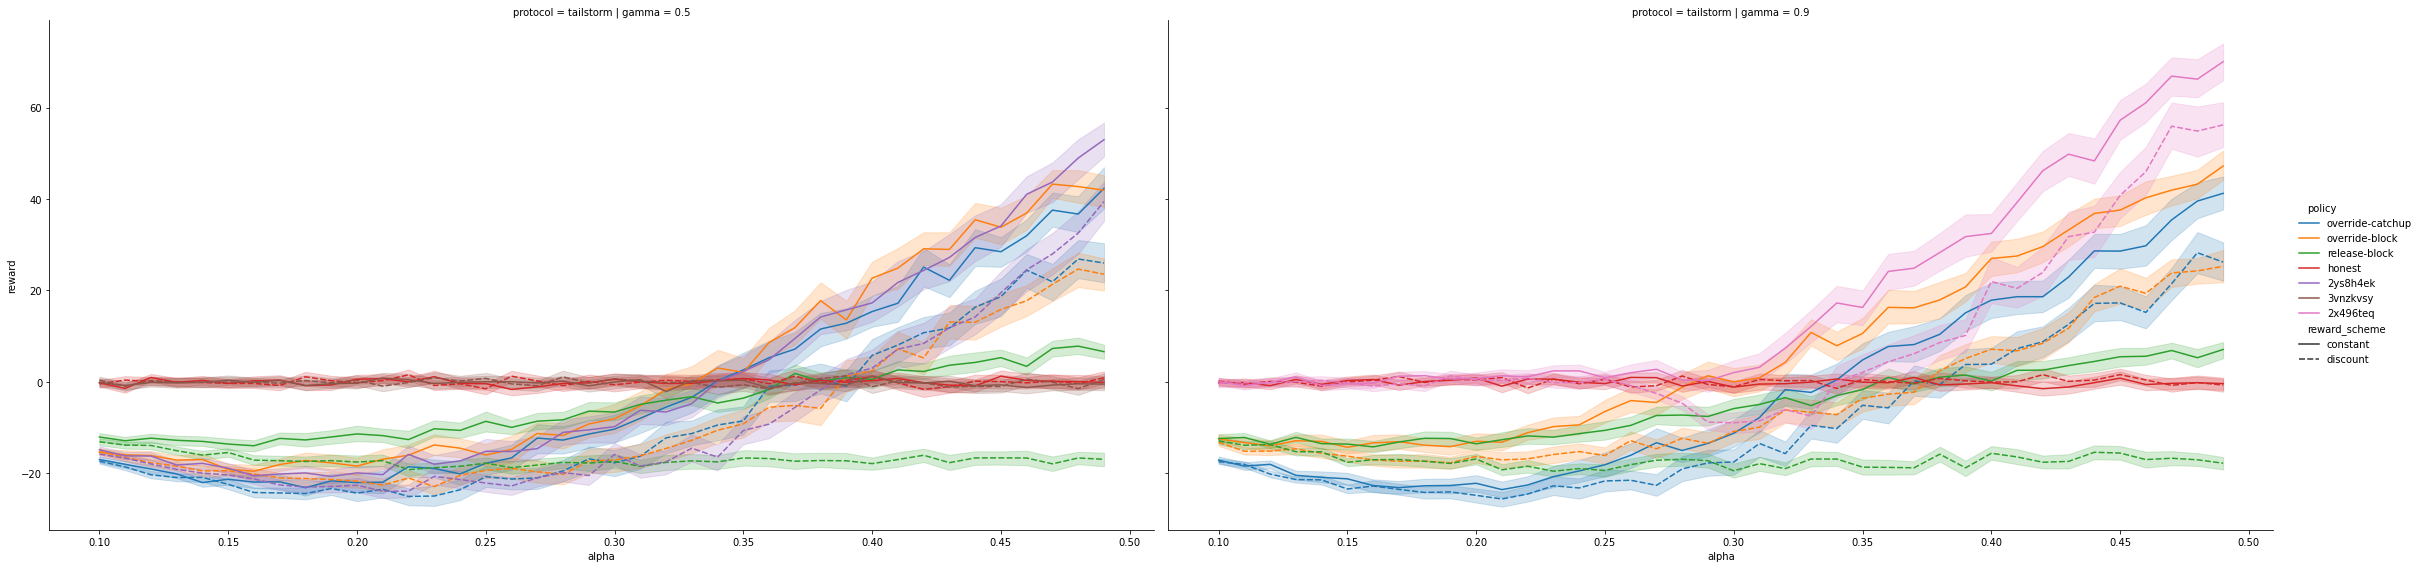

In [56]:
sns.relplot(
    data=breakevens,
    kind="line",
    x="alpha",
    y="reward",
    hue="policy",
    style="reward_scheme",
    row="protocol",
    col="gamma",
    height=8,
    aspect=2
)

In [9]:
gb[gb['reward'] >= 0]

reward
protocol  reward_scheme alpha policy                     
tailstorm constant      0.12  honest             0.940685
                        0.14  honest             0.311272
                        0.15  3vnzkvsy           0.333211
                        0.16  honest             0.213649
                        0.17  3vnzkvsy           0.306212
                              honest             0.371470
                        0.20  honest             0.561288
                        0.21  3vnzkvsy           0.826282
                              honest             0.668881
                        0.22  3vnzkvsy           0.478973
                        0.23  honest             1.109656
                        0.25  3vnzkvsy           0.013671
                        0.26  3vnzkvsy           0.017552
                        0.28  3vnzkvsy           0.135707
                        0.30  honest             0.546090
                        0.31  3vnzkvsy           0.468361
                              honest             0.021924
                        0.33  3vnzkvsy           0.243104
                        0.34  2ys8h4ek           0.067353
                              3vnzkvsy           0.235255
                              honest             0.262185
                              override-block     3.015485
                              override-catchup   0.218417
                        0.35  2ys8h4ek           2.277294
                              3vnzkvsy           0.345546
                              honest             0.721667
                              override-block     2.061820
                              override-catchup   2.608256
                        0.36  2ys8h4ek           4.829975
                              honest             0.392533
                              override-block     8.593400
                              override-catchup   5.269548
                        0.37  2ys8h4ek           9.448182
                              override-block    11.833249
                              override-catchup   7.146293
                              release-block      1.823142
                        0.38  2ys8h4ek          14.176799
                              honest             0.316494
                              override-block    17.761645
                              override-catchup  11.544997
                              release-block      0.152041
                        0.39  2ys8h4ek          15.733646
                              override-block    13.529059
                              override-catchup  12.821143
                              release-block      0.899671
                        0.40  2ys8h4ek          17.257407
                              3vnzkvsy           1.265162
                              honest             0.256564
                              override-block    22.669112
                              override-catchup  15.362557
                              release-block      0.545483
                        0.41  2ys8h4ek          21.731180
                              honest             0.721692
                              override-block    24.871539
                              override-catchup  17.186318
                              release-block      2.593918
                        0.42  2ys8h4ek          24.365427
                              override-block    29.097994
                              override-catchup  25.090775
                              release-block      2.254329
                        0.43  2ys8h4ek          27.201453
                              3vnzkvsy           0.134432
                              override-block    28.952441
                              override-catchup  22.199771
                              release-block      3.621108
                        0.44  2ys8h4ek          31.573789
                              override-block    35.447387
                              override-catchup  2